In [1]:
# Start writing code here...# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization
from dateutil import parser
import time
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Load the cleaned file
Data = pd.read_csv("DatawithDepartments.csv")

In [3]:
Data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Reported_Date,ID,season,Department
0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,(vertigo) Paroymsal Positional Vertigo,2021-01-01,63,Winter,Neurologist
1,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,(vertigo) Paroymsal Positional Vertigo,2021-01-01,112,Winter,Neurologist
2,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,Alcoholic hepatitis,2021-01-01,375,Winter,Hepatology
3,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,NO,NO,NO,NO,Arthritis,2021-01-01,710,Winter,Rheumatology
4,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,...,NO,NO,NO,NO,NO,GERD,2021-01-01,2081,Winter,Gastroenterology


In [4]:
#Binary columns with 2 values
#Target columns
target_col = ["Department"]
bin_cols   = Data.nunique()[Data.nunique() == 2].keys().tolist()
bin_cols

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',
 'weakness_in_limbs'

In [5]:
from sklearn.preprocessing import LabelEncoder
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    Data[i] = le.fit_transform(Data[i])

In [6]:
from category_encoders import OrdinalEncoder

Dict={'winter':1,'Spring':2,'Summer':3,"Winter":4}

#Create object for one-hot encoding
Ordinal_encoder=OrdinalEncoder(cols=['season'],return_df=True, mapping=[{'col':'season','mapping':Dict}])


#Fit & Transform
Data = Ordinal_encoder.fit_transform(Data)

#Encoded Data
Data.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Reported_Date,ID,season,Department
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,2021-01-01,63,4.0,Neurologist
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,2021-01-01,112,4.0,Neurologist
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Alcoholic hepatitis,2021-01-01,375,4.0,Hepatology
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Arthritis,2021-01-01,710,4.0,Rheumatology
4,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,GERD,2021-01-01,2081,4.0,Gastroenterology


In [7]:
Dict={'NO':0,'YES':1}

#Create object for one-hot encoding
Ordinal_encoder=OrdinalEncoder(cols=['fluid_overload'],return_df=True, mapping=[{'col':'fluid_overload','mapping':Dict}])


#Fit & Transform
Data = Ordinal_encoder.fit_transform(Data)

#Encoded Data
Data.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Reported_Date,ID,season,Department
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,2021-01-01,63,4.0,Neurologist
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,2021-01-01,112,4.0,Neurologist
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Alcoholic hepatitis,2021-01-01,375,4.0,Hepatology
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Arthritis,2021-01-01,710,4.0,Rheumatology
4,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,GERD,2021-01-01,2081,4.0,Gastroenterology


In [8]:
le1 = LabelEncoder()
for i in target_col :
    Data[i] = le1.fit_transform(Data[i])


In [9]:
Data['prognosis'] = le1.fit_transform(Data['prognosis'])

In [10]:
Data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Reported_Date,ID,season,Department
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2021-01-01,63,4.0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2021-01-01,112,4.0,7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,2021-01-01,375,4.0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,2021-01-01,710,4.0,11
4,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,16,2021-01-01,2081,4.0,4


In [11]:
print(Data.isnull().values.any())
print(Data.isnull().sum())

False
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
prognosis               0
Reported_Date           0
ID                      0
season                  0
Department              0
Length: 137, dtype: int64


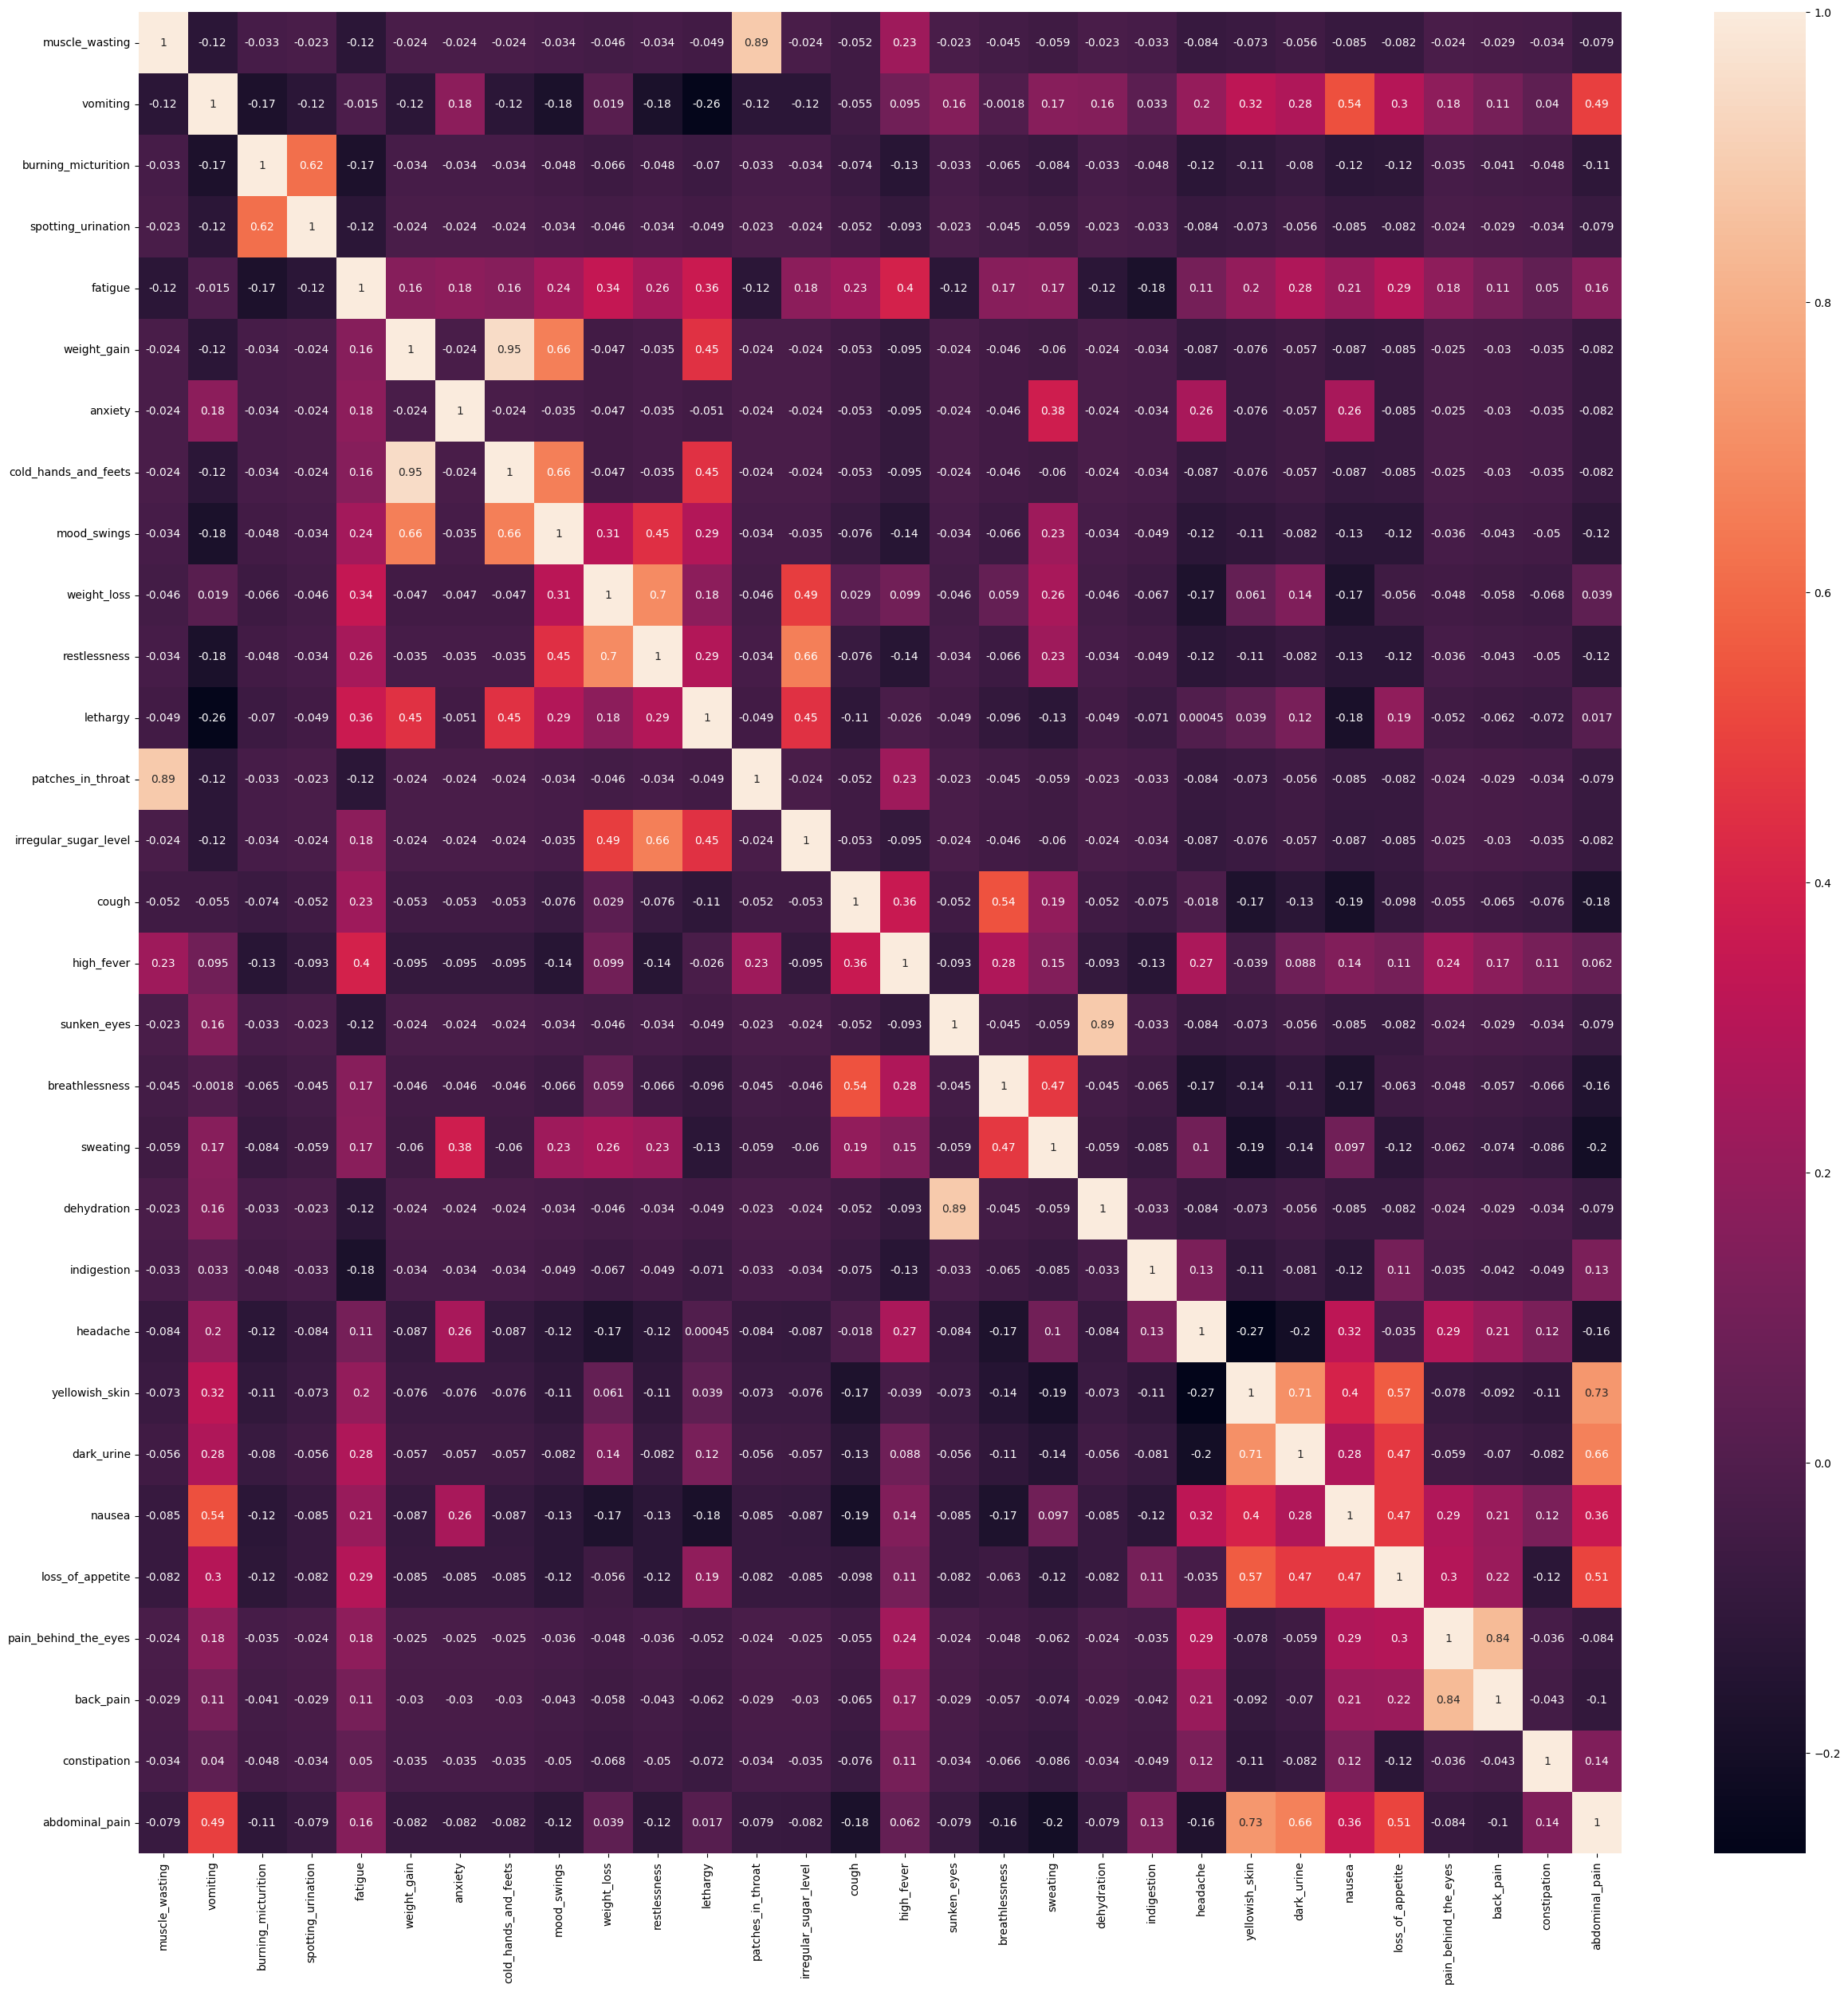

In [12]:
df_corr = Data.iloc[:, 10:40]
plt.figure(figsize = (30, 30))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

In [13]:
# Separate the features from the class label a
y = Data['Department']
X = Data.drop(['Department','Reported_Date','ID','prognosis'], axis = 1)

In [14]:
y.shape

(4800,)

In [15]:
X.shape

(4800, 133)

In [16]:
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,season
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
4,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,4.0


In [17]:
y.head()

0     7
1     7
2     6
3    11
4     4
Name: Department, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score

In [19]:
#split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,stratify=y)
X_train1,X_test,y_train1,y_test=train_test_split(X_train,y_train,test_size=0.3,stratify=y_train,random_state=12)

In [20]:
print(X_train1.shape)
print(y_train1.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)


(2688, 133)
(2688,)
(960, 133)
(960,)
(1152, 133)
(1152,)


In [21]:
from tensorflow.keras.utils import to_categorical
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size = 0.2, random_state = 0)
y_train2 = to_categorical(y_train1)
y_val1 = to_categorical(y_val)
y_test1 = to_categorical(y_test)

2022-12-03 17:30:49.425088: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 17:30:49.534447: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-03 17:30:49.540092: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-03 17:30:49.540110: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [22]:
print(X_train1.shape)
print(y_train2.shape)
print(X_val.shape)
print(y_val1.shape)
print(X_test.shape)
print(y_test1.shape)

(2688, 133)
(2688, 13)
(960, 133)
(960, 13)
(1152, 133)
(1152, 13)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

network1 = Sequential()
network1.add(Dense(128, activation='relu', input_shape=(133,)))
#network1.add(Dropout(0.1))
network1.add(Dense(64, activation='relu'))
#network1.add(Dropout(0.1))
#network1.add(Dense(256, activation='relu'))
network1.add(Dense(13, activation='softmax'))

network1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               17152     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 13)                845       
                                                                 
Total params: 26,253
Trainable params: 26,253
Non-trainable params: 0
_________________________________________________________________
2022-12-03 17:30:52.288344: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-03 17:30:52.288377: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to

In [24]:
import tensorflow as tf
adam =tf.keras.optimizers.Adam(lr = 0.0001)
network1.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])

In [25]:
from tensorflow import keras
history = network1.fit(X_train1,y_train2,validation_data=(X_val, y_val1),epochs=5, batch_size=28, verbose=1)

Epoch 1/5
96/96 [==============================] - 1s 5ms/step - loss: 2.4219 - accuracy: 0.1860 - val_loss: 2.2835 - val_accuracy: 0.3354
Epoch 2/5
96/96 [==============================] - 0s 3ms/step - loss: 2.1265 - accuracy: 0.4144 - val_loss: 1.9665 - val_accuracy: 0.5375
Epoch 3/5
96/96 [==============================] - 0s 2ms/step - loss: 1.7835 - accuracy: 0.6354 - val_loss: 1.6032 - val_accuracy: 0.7240
Epoch 4/5
96/96 [==============================] - 0s 2ms/step - loss: 1.4116 - accuracy: 0.7474 - val_loss: 1.2287 - val_accuracy: 0.7635
Epoch 5/5
96/96 [==============================] - 0s 3ms/step - loss: 1.0556 - accuracy: 0.8192 - val_loss: 0.9070 - val_accuracy: 0.8771


In [26]:
test_loss, test_acc = network1.evaluate(X_test,y_test1)
print('test_acc:', test_acc)

36/36 [==============================] - 0s 830us/step - loss: 0.8909 - accuracy: 0.8724
test_acc: 0.8723958134651184


In [27]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay 
from sklearn.metrics import multilabel_confusion_matrix

y_pred1 = network1.predict(X_test)
y_pred=np.argmax(y_pred1, axis=1) #greater than 0.50 on scale 0 to 1
true_label=np.argmax(y_test1,axis=1)
#print(y_pred)
cm1=tf.math.confusion_matrix(true_label,y_pred)
cm1

36/36 [==============================] - 0s 747us/step


<tf.Tensor: shape=(13, 13), dtype=int32, numpy=
array([[ 32,   0,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  10,   0,   0,  13,   0,   0,  35,   0,   0,   0,   0,   0],
       [  0,   0, 144,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 115,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 259,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 173,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  21,   0,  37,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  86,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  11,   0,   0,   7,  25,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   4,   0,  24,   0,   0,   0],
       [  0,   0,   0,   0,   6,   0,   0,   0,   0,   0,  66,   0,   0],
       [  0,   0,  20,   0,   0,   0,   0,   1,   0,   0,   0,   8,   0],
       [  0,   0,   3,   0,   0,   0,   0,   0,   0,   0,   0,  

In [30]:
print("precision score:", precision_score(true_label, y_pred,average='micro'))
print("recall score:", recall_score(true_label, y_pred,average='micro'))
print("F1 Score:", f1_score(true_label, y_pred,average='micro'))

precision score: 0.8723958333333334
recall score: 0.8723958333333334
F1 Score: 0.8723958333333334


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d46ea96d-c653-44a9-9fca-7137a63d912b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>